# Heatmap of Mean Values in 2D Histogram Bins #

In this post we will look at how to use the pandas python module and the seaborn python module to create a heatmap of the mean values of a response variable for 2-dimensional bins from a histogram.

Let’s get started by including the modules we will need in our example.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use a seed to have reproducible results.

np.random.seed(20190121)

# Simulate Data #

Now, we simulate some data. We will have two features, which are both pulled from normalized gaussians. The response variable z will simply be a linear function of the features: z = x - y.

In [3]:
nSamples = 1000 
nCut = 10

def zFunction(X):
    # z = x - y
    return X[:, 0] - X[:, 1]

print('Generating Data')
data = np.random.normal(size = (nSamples, 2))
data = pd.DataFrame(data)
data['z'] = zFunction(data.values)
data.info()

Generating Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   z       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### As an aside, df.values gives you access to the dataframes values as a list of lists, where each row is a list of the columns values: ###

In [6]:
data.values

array([[-0.19213438, -0.78459334,  0.59245896],
       [-0.99534774,  0.40017661, -1.39552435],
       [ 0.65192057,  0.38702675,  0.26489382],
       ...,
       [-0.7386197 , -0.61160743, -0.12701227],
       [ 1.45333665, -0.55923477,  2.01257142],
       [-0.5038508 , -2.0330417 ,  1.5291909 ]])

## It's also interesting to see the data itself: ##

In [7]:
data.head()

,0,1,z
0,-0.192134,-0.784593,0.592459
1,-0.995348,0.400177,-1.395524
2,0.651921,0.387027,0.264894
3,0.863363,0.343350,0.520013
4,0.971348,-0.933158,1.904506


## Let's take a look at a scatterplot of the data. ##

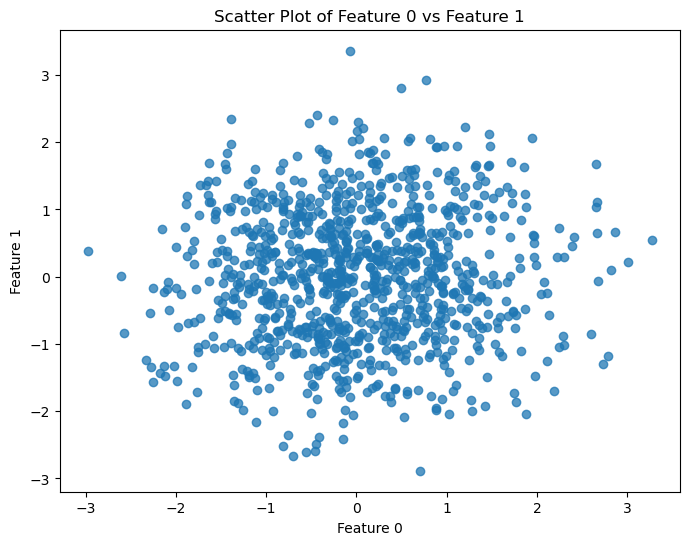

In [10]:
# Plot Column 0 vs Column one as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[0], data[1], alpha=0.75)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Feature 0 vs Feature 1')
plt.show()

## Let's take a look at a kernel density estimate plot using seaborn ##

/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelkuby/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

<Figure size 800x600 with 0 Axes>

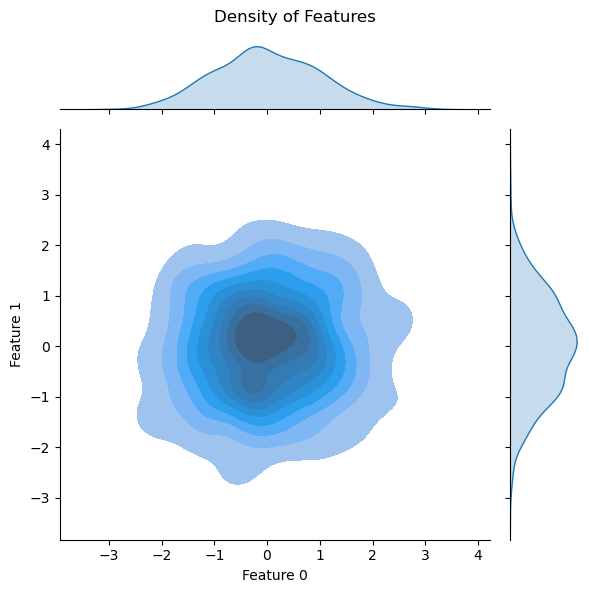

In [27]:
# Add density to the jointplot

plt.figure(figsize=(8, 6))
sns.jointplot(x=0, y=1, data=data, kind='kde', fill=True)
plt.gcf().suptitle('Density of Features')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.tight_layout()


# Make Cuts - Panda's GroupBy #

Next, let's use pd.cut() to make cuts for our 2d bins. The line of code is quite complicated but keep in mind that the goal of the resultant df cuts is to place the original data into a resulting bin.

In [29]:
cuts = pd.DataFrame({str(feature) + 'Bin' : pd.cut(data[feature], nCut) for feature in [0, 1]})
print('At first cuts are pandas .IntervalIndex.\n')
print(cuts.head())
print()
print(cuts.info())

at first cuts are pandas intervalindex.
              0Bin              1Bin
0  (-0.476, 0.148]  (-1.012, -0.387]
1   (-1.1, -0.476]    (0.237, 0.861]
2   (0.148, 0.773]    (0.237, 0.861]
3   (0.773, 1.397]    (0.237, 0.861]
4   (0.773, 1.397]  (-1.012, -0.387]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0Bin    1000 non-null   category
 1   1Bin    1000 non-null   category
dtypes: category(2)
memory usage: 3.0 KB
None


Note, that the types of the bins are labeled as category, but one should use methods from pandas.IntervalIndex to work with them.

# Do the GroupBy and make HeatMap #

Now let's find the mean of z for each 2d feature bin; we will be doing a groupby using both of the bins for feature 0 and feature 1

In [45]:
join_cols = cuts.columns.tolist()
means = data.join(cuts).groupby(join_cols, observed=False).mean()
means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.

Let's take a look at the means of the response variable. First we will reverse the order of means since the heatmap will print from top to bottom.# Reverse the order of the rows as the heatmap will print from top to bottom.

In [46]:
# Reverse the order of the rows as the heatmap will print from top to bottom.
means = means.iloc[::-1] # Start from the beginning, go to the end, and reverse the order.
print(means['z']) # Let's take a look at the means of the response variable

0Bin              (-2.979, -2.349]  (-2.349, -1.725]  (-1.725, -1.1]  \
1Bin                                                                   
(2.735, 3.359]                 NaN               NaN             NaN   
(2.11, 2.735]                  NaN               NaN       -3.731144   
(1.486, 2.11]                  NaN               NaN       -3.141405   
(0.861, 1.486]                 NaN         -2.950698       -2.545397   
(0.237, 0.861]           -3.355331         -2.448135       -1.822578   
(-0.387, 0.237]          -2.616789         -1.875671       -1.262530   
(-1.012, -0.387]         -1.733825         -1.331019       -0.707261   
(-1.636, -1.012]               NaN         -0.716108        0.019549   
(-2.26, -1.636]                NaN         -0.023349        0.709936   
(-2.891, -2.26]                NaN               NaN             NaN   

0Bin              (-1.1, -0.476]  (-0.476, 0.148]  (0.148, 0.773]  \
1Bin                                                              

Let's now graph a heat map for the means of z..

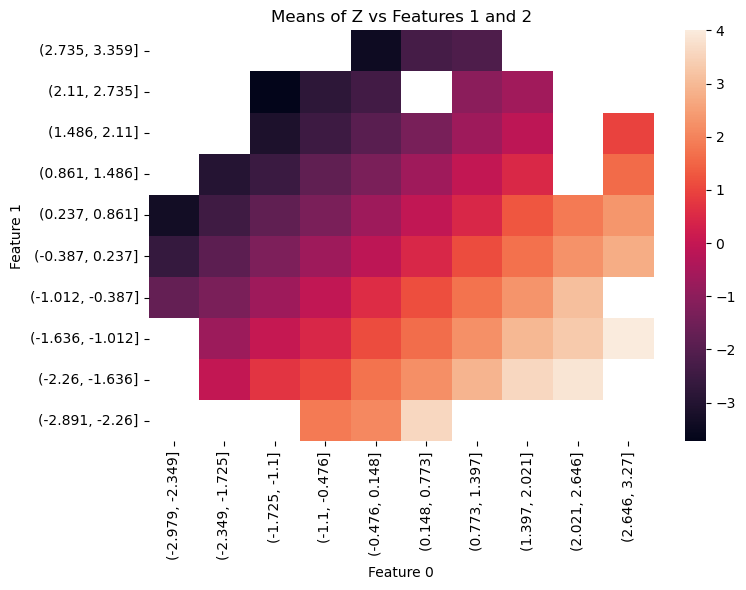

In [50]:
# Graph a heat map for the means of z
plt.figure(figsize=(8, 6))
sns.heatmap(means['z'], fmt='.2f')
plt.title('Means of Z vs Features 1 and 2')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.tight_layout()

As we can see, the x and y labels are intervals. This makes the graph look cluttered. Let us now use the left endpoint of each interval as a label. We will use pandas.IntervalIndex.left.

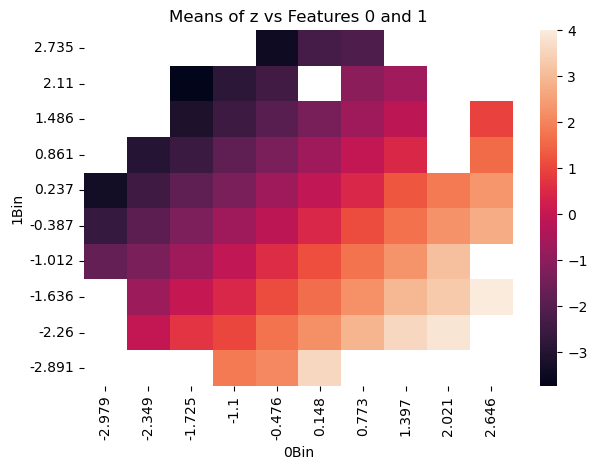

In [51]:
plt.clf()
sns.heatmap(means['z'], xticklabels = means['z'].columns.map(lambda x : x.left),
                        yticklabels = means['z'].index.map(lambda x : x.left))
plt.title('Means of z vs Features 0 and 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.tight_layout()

Which gives our final graph